In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imshow
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
x_train_set_fpath = '/content/drive/MyDrive/X_test_sat4.csv'
y_train_set_fpath = '/content/drive/MyDrive/y_test_sat4.csv'
print ('Loading Training Data')

X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 x 28 x 4 images')

Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels


In [ ]:
# Charger les données
x_train_set_fpath = '/content/drive/MyDrive/X_test_sat4.csv'
y_train_set_fpath = '/content/drive/MyDrive/y_test_sat4.csv'

print('Loading Training Data')
X_train = np.loadtxt(x_train_set_fpath, delimiter=',')
Y_train = np.loadtxt(y_train_set_fpath, delimiter=',')

print('Loaded 28 x 28 x 4 images')
print('Loaded labels')

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels


In [ ]:
print(X_train.shape)

(80000, 28, 28, 4)


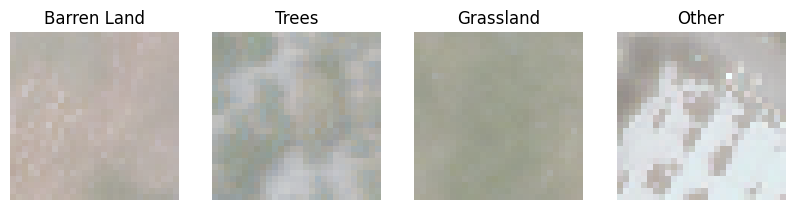

In [ ]:
# Définir les noms de classes
class_names = ['Barren Land', 'Trees', 'Grassland', 'Other']

# Reshape each sample from a list of numbers to a 28x28x4 image
X_train_img = X_train.reshape([-1, 28, 28, 4]).astype(float)

# Normalisation des valeurs de pixel
X_train_img /= 255.0

# Visualiser un exemple de chaque classe
plt.figure(figsize=(10, 6))
for i in range(4):
    # Sélectionner un exemple de chaque classe
    idx = np.argmax(Y_train[:, i])  # Index de la première occurrence de la classe
    image = X_train_img[idx]  # Récupérer l'image correspondante
    label = class_names[i]  # Nom de la classe

    # Afficher l'image
    plt.subplot(1, 4, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.show()


Barren Land (Terrain stérile) : Cette classe représente les zones de terre qui sont généralement stériles et ne supportent pas beaucoup de végétation. Cela peut inclure des zones de désert, de rochers, de sable.

Trees (Arbres) : Cette classe représente les zones de terrain couvertes d'arbres ou de forêts. Ces zones ont une densité élevée de végétation arborescente.

rassland (Prairies) : Cette classe représente les zones de terrain couvertes d'herbe ou de prairies. Ces zones peuvent avoir une végétation plus basse que les forêts mais sont toujours principalement couvertes de végétation herbacée.



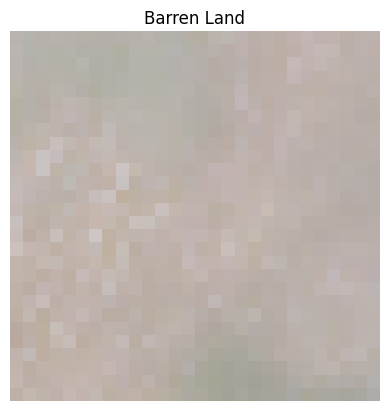

In [ ]:
# Définir les noms de classes
class_names = ['Barren Land', 'Trees', 'Grassland', 'Other']

# Reshape each sample from a list of numbers to a 28x28x4 image
X_train_img = X_train.reshape([-1, 28, 28, 4]).astype(float)

# Normaliser les valeurs de pixel pour qu'elles soient dans la plage [0, 1]
X_train_img /= 255.0

# Choisissez un index pour l'image que vous souhaitez afficher
idx = 0  # Index de l'image à afficher

# Afficher l'image
plt.imshow(X_train_img[idx])
plt.title(class_names[np.argmax(Y_train[idx])])  # Afficher le label de l'image
plt.axis('off')
plt.show()

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_train_img, Y_train, test_size=0.2, random_state=42)

In [ ]:
# Création du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes pour les 4 labels différents
])

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 12s 7ms/step - loss: 0.3326 - accuracy: 0.8784 - val_loss: 0.2479 - val_accuracy: 0.9101
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1646 - accuracy: 0.9426 - val_loss: 0.1083 - val_accuracy: 0.9646
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1269 - accuracy: 0.9563 - val_loss: 0.0909 - val_accuracy: 0.9702
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1088 - accuracy: 0.9624 - val_loss: 0.0966 - val_accuracy: 0.9669
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0951 - accuracy: 0.9663 - val_loss: 0.1082 - val_accuracy: 0.9617
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0842 - accuracy: 0.9710 - val_loss: 0.0817 - val_accuracy: 0.9741
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0782 - accuracy: 0.9728 - val_loss: 0.0643 - val_accuracy

In [ ]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on test set:", test_acc)

625/625 [==============================] - 3s 4ms/step - loss: 0.0818 - accuracy: 0.9722
Accuracy on test set: 0.9721999764442444


625/625 [==============================] - 1s 2ms/step


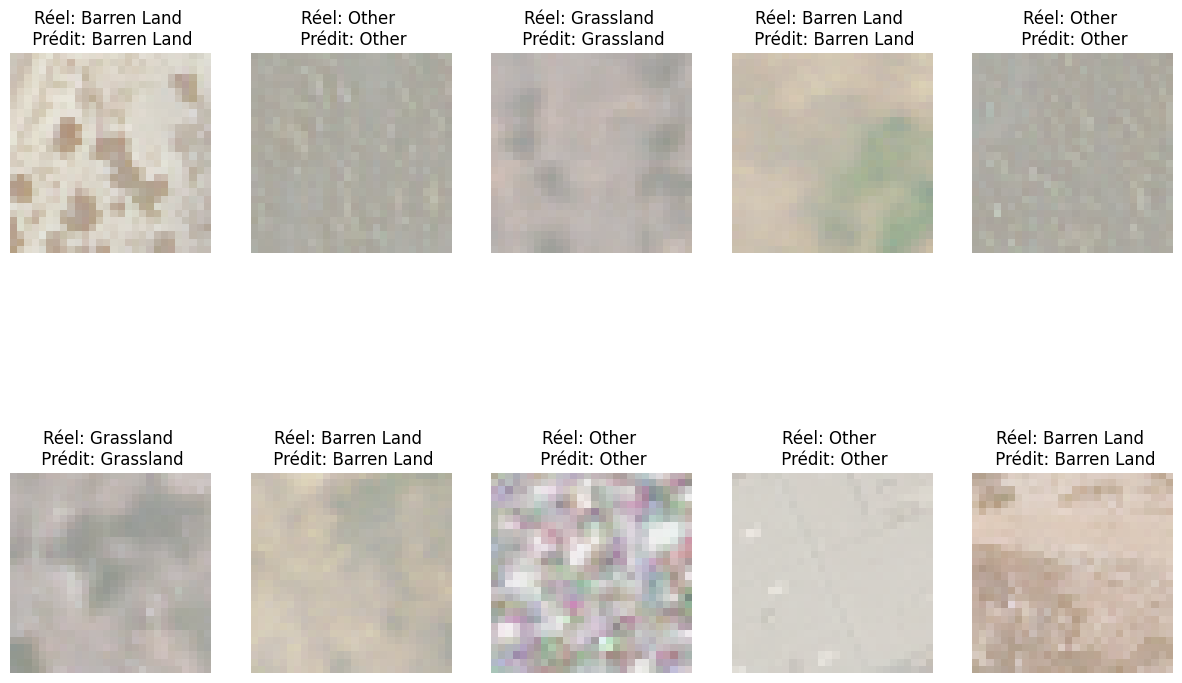

In [ ]:
# Prédire les étiquettes des images de l'ensemble de test
Y_pred = model.predict(X_test)

# Afficher les images réelles et les images prédites
plt.figure(figsize=(15, 10))
for i in range(10):  # Afficher les 10 premières images
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])  # Afficher l'image réelle
    plt.title(f"Réel: {class_names[np.argmax(Y_test[i])]} \n Prédit: {class_names[np.argmax(Y_pred[i])]}")
    plt.axis('off')

plt.show()